Importing all the relevant libraries, setting the style as whitegrid

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

importing the given file

In [11]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv') #  reading the dataset
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
df_1 = df

con_col = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

df_1 = pd.get_dummies(df_1, columns = cat_col, drop_first = True)

X = df_1.drop(['output'],axis=1)
y = df_1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_col] = scaler.fit_transform(X[con_col])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# **UNDERSTANDING THE DATA**

Printing out the number of samples for each class

In [12]:
count_0 = len(df[df['output'] == 0])  #  filtering the dataframe based on the condition class = 0
print(f"the number of samples with less chance of heart attack is {count_0}")
count_1 = len(df[df['output'] == 1])  #  filtering the dataframe based on the condition class = 1
print(f"the number of samples with higher chance of heart attack is {count_1}")

the number of samples with less chance of heart attack is 138
the number of samples with higher chance of heart attack is 165


Plotting some figures to visualize the dataset

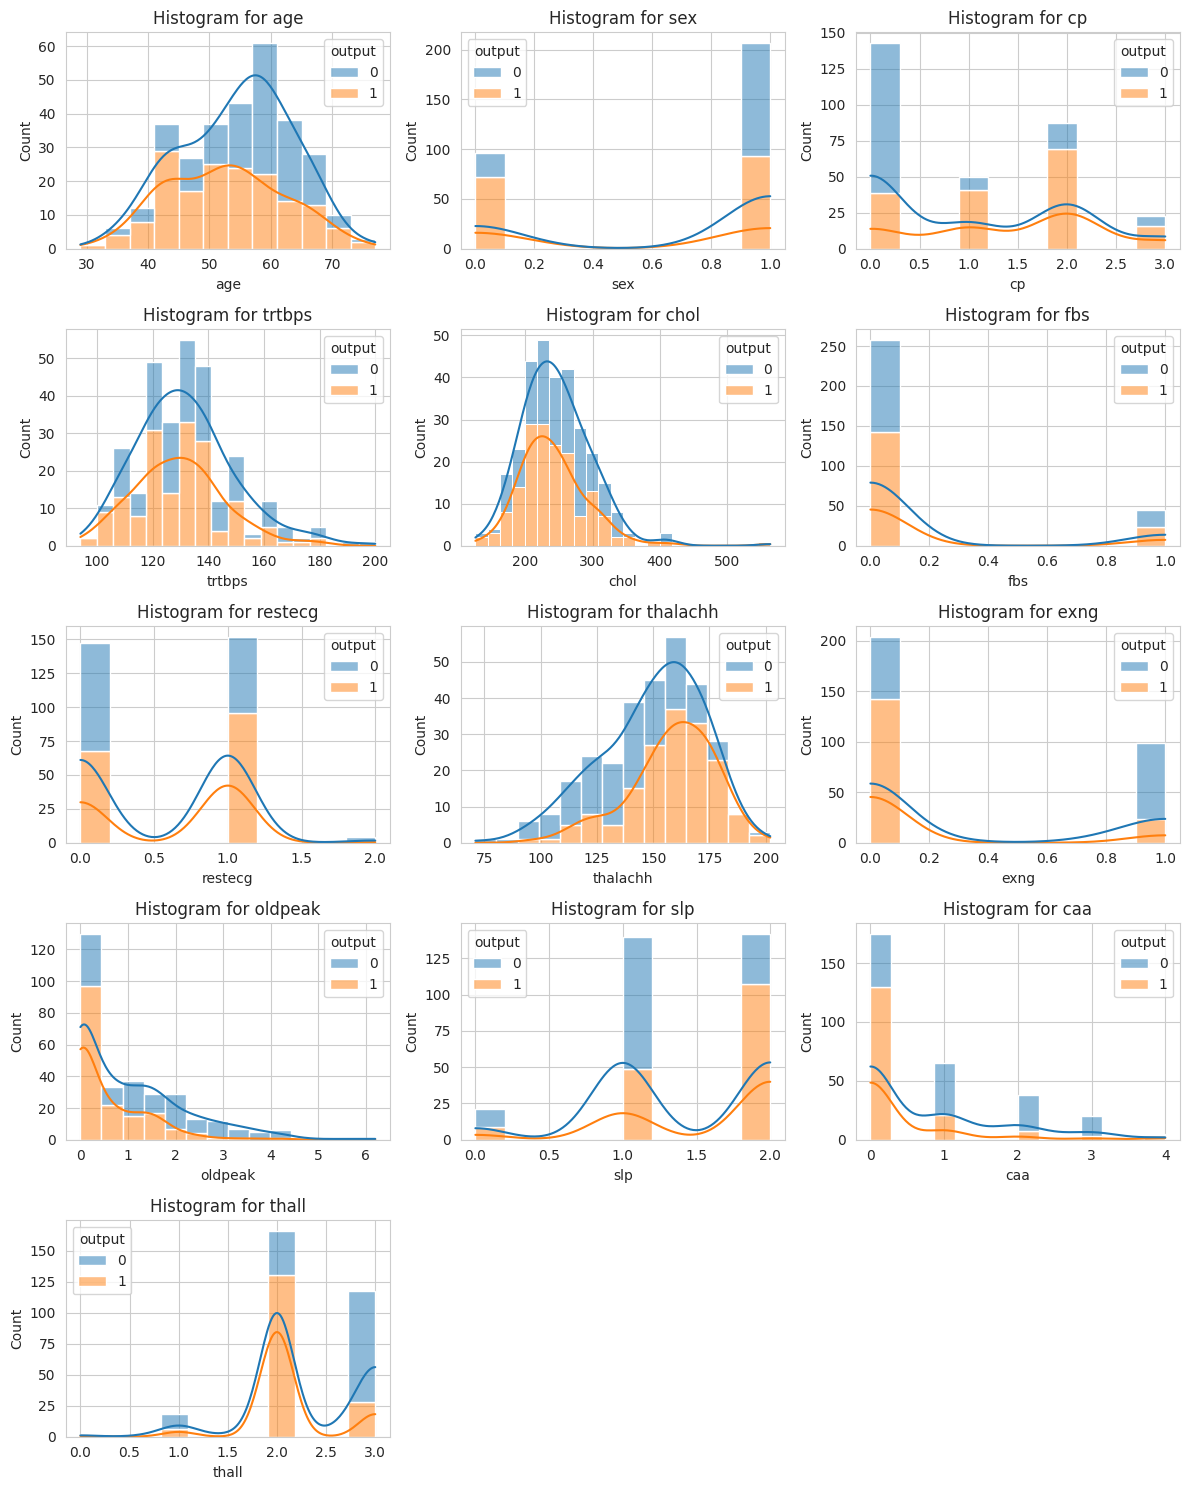

In [18]:
plt.figure(figsize=(12, 15))  #  deciding the plot size

analysis_cols = [col for col in df.columns if col != "output"]

for i, col in enumerate(analysis_cols):
    plt.subplot(5, 3, i+1)  #  creating a 3x3 figure to showcase each histogram
    sns.histplot(data=df, x=col, hue='output', kde=True, multiple='stack')  #  plotting a histogram for each feature, while considering the class, and combining it with kde
    plt.title('Histogram for '+ col) #  adding a title for each plot

plt.tight_layout() #  preventing overlapping within the figure
plt.show()

printing-out the statistical description of features (e.g., the input variable x), such as mean, std, max and min values, etc. for output 1

In [21]:
stats_class_1 = df[df['output'] == 1].drop(columns=['output']).describe().transpose()  #  filtering the dataframe by class = 1, then removing the class column, and then getting the statistical descriptions
stats_class_1

,count,mean,std,min,25%,50%,75%,max
age,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0
sex,165.0,0.563636,0.497444,0.0,0.0,1.0,1.0,1.0
cp,165.0,1.375758,0.952222,0.0,1.0,2.0,2.0,3.0
trtbps,165.0,129.303030,16.169613,94.0,120.0,130.0,140.0,180.0
chol,165.0,242.230303,53.552872,126.0,208.0,234.0,267.0,564.0
fbs,165.0,0.139394,0.347412,0.0,0.0,0.0,0.0,1.0
restecg,165.0,0.593939,0.504818,0.0,0.0,1.0,1.0,2.0
thalachh,165.0,158.466667,19.174276,96.0,149.0,161.0,172.0,202.0
exng,165.0,0.139394,0.347412,0.0,0.0,0.0,0.0,1.0
oldpeak,165.0,0.583030,0.780683,0.0,0.0,0.2,1.0,4.2


printing-out the statistical description of features (e.g., the input variable x), such as mean, std, max and min values, etc. for output 0

In [22]:
stats_class_0 = df[df['output'] == 0].drop(columns=['output']).describe().transpose()  #  filtering the dataframe by class = 1, then removing the class column, and then getting the statistical descriptions
stats_class_0

,count,mean,std,min,25%,50%,75%,max
age,138.0,56.601449,7.962082,35.0,52.00,58.0,62.00,77.0
sex,138.0,0.826087,0.380416,0.0,1.00,1.0,1.00,1.0
cp,138.0,0.478261,0.905920,0.0,0.00,0.0,0.00,3.0
trtbps,138.0,134.398551,18.729944,100.0,120.00,130.0,144.75,200.0
chol,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
fbs,138.0,0.159420,0.367401,0.0,0.00,0.0,0.00,1.0
restecg,138.0,0.449275,0.541321,0.0,0.00,0.0,1.00,2.0
thalachh,138.0,139.101449,22.598782,71.0,125.00,142.0,156.00,195.0
exng,138.0,0.550725,0.499232,0.0,0.00,1.0,1.00,1.0
oldpeak,138.0,1.585507,1.300340,0.0,0.60,1.4,2.50,6.2


Splitting the data into a 80% training and 20% testing set, then setting the kfold value

In [58]:
X_train, X_test, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify=y, random_state=10)

# Extracting the target variable as a pandas Series
train_y = train_y.squeeze()
test_y = test_y.squeeze()

# Scaling the features
scaler = StandardScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)

In [54]:
#  store kfold split value
kfold = KFold(n_splits = 5)

# **Decision Tree**

Hyperparameter tuning

In [49]:
scoring = ['accuracy', 'precision', 'recall', 'f1']  # Defining the scoring metrics

tree_entropy = DecisionTreeClassifier(criterion='entropy')  #  creating a decision tree classifier with Entropy criterion

# Performing cross-validation with Entropy criterion
scores_entropy = cross_validate(tree_entropy, train_x, train_y, cv=kfold, scoring=scoring)
#  Printing the results
print("Entropy Criterion Accuracy, Precision, Recall, and F1-score :", scores_entropy['test_accuracy'].mean(), scores_entropy['test_precision'].mean(), scores_entropy['test_recall'].mean(), scores_entropy['test_f1'].mean())

tree_gini = DecisionTreeClassifier(criterion='gini') # Creating a decision tree classifier with Gini criterion

# Performing cross-validation with Gini criterion
scores_gini = cross_validate(tree_gini, train_x, train_y, cv=kfold, scoring=scoring)
#  Printing the results
print("Gini Criterion Accuracy, Precision, Recall, and F1-score :", scores_gini['test_accuracy'].mean(), scores_gini['test_precision'].mean(), scores_gini['test_recall'].mean(), scores_gini['test_f1'].mean())

#  finding the better performing criterion by comparing the numbers
best_criterion_accuracy = 'Entropy' if scores_entropy['test_accuracy'].mean() > scores_gini['test_accuracy'].mean() else 'Gini'
best_criterion_precision = 'Entropy' if scores_entropy['test_precision'].mean() > scores_gini['test_precision'].mean() else 'Gini'
best_criterion_recall = 'Entropy' if scores_entropy['test_recall'].mean() > scores_gini['test_recall'].mean() else 'Gini'
best_criterion_f1 = 'Entropy' if scores_entropy['test_f1'].mean() > scores_gini['test_f1'].mean() else 'Gini'

# Printing the best criterion for each evaluation metric
print("Best criterion for Accuracy:", best_criterion_accuracy)
print("Best criterion for Precision:", best_criterion_precision)
print("Best criterion for Recall:", best_criterion_recall)
print("Best criterion for F1-score:", best_criterion_f1)

Entropy Criterion Accuracy, Precision, Recall, and F1-score : 0.7562925170068027 0.7776905207683239 0.7685475444096135 0.7704465389057994
Gini Criterion Accuracy, Precision, Recall, and F1-score : 0.7355442176870748 0.7824705882352941 0.7123301985370951 0.7432172078661182
Best criterion for Accuracy: Entropy
Best criterion for Precision: Gini
Best criterion for Recall: Entropy
Best criterion for F1-score: Entropy


Testing Decision tree with the criterion entropy as it had the overall best performance for this datasplit

In [64]:
tree = DecisionTreeClassifier(criterion='entropy').fit(train_x, train_y)  #  creating a decision tree classifier using the entropy criterion and fitting it to the training data

In [65]:
pred_y_tree = tree.predict(test_x)  #  predicting test values

report = classification_report(test_y, pred_y_tree, digits=4)  #  reporting precision, recall, f1 score, accuracy, and other results compared to the test results
print(report)

              precision    recall  f1-score   support

           0     0.7826    0.6429    0.7059        28
           1     0.7368    0.8485    0.7887        33

    accuracy                         0.7541        61
   macro avg     0.7597    0.7457    0.7473        61
weighted avg     0.7578    0.7541    0.7507        61



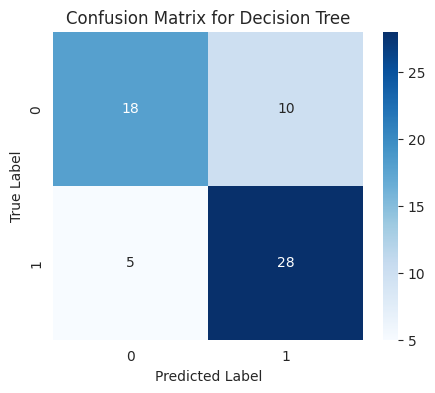

In [66]:
conf_matrix = confusion_matrix(test_y, pred_y_tree) #  creating a confusion matrix to plot the results

#  Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))  #  deciding the size of the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  #  creating the heatmap
plt.xlabel('Predicted Label')  #  adding labels
plt.ylabel('True Label')  #  adding labels
plt.title('Confusion Matrix for Decision Tree')  #  adding a title
plt.show()  #  printing the resulted figure

# **KNN**

Tuning the hyperparameter k

In [59]:
k_values = [i for i in range(1,11)]  #  testing for k from 1 to 10

#  dictionary to hold knn scores for different models
knn_score = {}

#  create differenet knn models and evaluate them, the scores are then stored in the dictionary
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  score =  cross_validate(estimator = knn,
                           X = train_x,
                           y = train_y,
                           cv = kfold,
                           scoring = ('accuracy', 'precision', 'recall', 'f1'),
                          return_train_score = True)

  knn_score[k] = score

#  create lists to store accuracy, precision, recall and fscore
acc_knn = np.zeros(10)
recall_knn = np.zeros(10)
precision_knn = np.zeros(10)
fscore_knn = np.zeros(10)

#  print scores for all the knn models and store it in the list
for i in range(1,11):
  print('K = {} \tAccuracy:{} \tRecall:{} \tPrecision:{} \tFscore:{}'.format(i,knn_score[i]['test_accuracy'].mean(),
                                                                             knn_score[i]['test_recall'].mean(),
                                                                             knn_score[i]['test_precision'].mean(),
                                                                             knn_score[i]['test_f1'].mean()))

  acc_knn[i-1] = knn_score[i]['test_accuracy'].mean()
  recall_knn[i-1] = knn_score[i]['test_recall'].mean()
  precision_knn[i-1] = knn_score[i]['test_precision'].mean()
  fscore_knn[i-1] = knn_score[i]['test_f1'].mean()

#  print models with the highest score in each category
print("\nKNN with highest accuracy:{}. \tAccuracy:{}".format(np.argmax(acc_knn)+1, np.max(acc_knn)))
print("KNN with highest precision:{}. \tPrecision:{}".format(np.argmax(precision_knn)+1, np.max(precision_knn)))
print("KNN with highest recall:{}. \tRecall:{}".format(np.argmax(recall_knn)+1, np.max(recall_knn)))
print("KNN with highest fscore:{}. \tFscore:{}".format(np.argmax(fscore_knn)+1, np.max(fscore_knn)))

K = 1 	Accuracy:0.7686224489795919 	Recall:0.7896029258098224 	Precision:0.7876844738913705 	Fscore:0.785600425438197
K = 2 	Accuracy:0.7647108843537415 	Recall:0.6817920585161964 	Precision:0.8579365079365079 	Fscore:0.7589267193140083
K = 3 	Accuracy:0.772704081632653 	Recall:0.8017241379310345 	Precision:0.7851165519686097 	Fscore:0.7905702917771883
K = 4 	Accuracy:0.7892006802721089 	Recall:0.7470219435736678 	Precision:0.8458672438672439 	Fscore:0.7904539247299179
K = 5 	Accuracy:0.7972789115646258 	Recall:0.8374085684430511 	Precision:0.8028432588916461 	Fscore:0.8142114241690512
K = 6 	Accuracy:0.7930272108843537 	Recall:0.7834639498432601 	Precision:0.8295213032581454 	Fscore:0.8008941078475121
K = 7 	Accuracy:0.8096088435374149 	Recall:0.8578631138975966 	Precision:0.803769903186739 	Fscore:0.8256972118063214
K = 8 	Accuracy:0.8096938775510205 	Recall:0.816118077324974 	Precision:0.8313916887709991 	Fscore:0.8194454031627858
K = 9 	Accuracy:0.8137755102040817 	Recall:0.8449059

Testing KNN with the k value of 3 as it had the overall best performance for this datasplit

In [60]:
#  create knn model with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors = 9)

#  fit the knn model with train dataset
knn_optimal.fit(train_x, train_y)

#  predict values using the knn model
pred_y_knn = knn_optimal.predict(test_x)

#  reporting precision, recall, f1 score, accuracy, and other results
report = classification_report(test_y, pred_y_knn, digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.8214    0.8214    0.8214        28
           1     0.8485    0.8485    0.8485        33

    accuracy                         0.8361        61
   macro avg     0.8350    0.8350    0.8350        61
weighted avg     0.8361    0.8361    0.8361        61



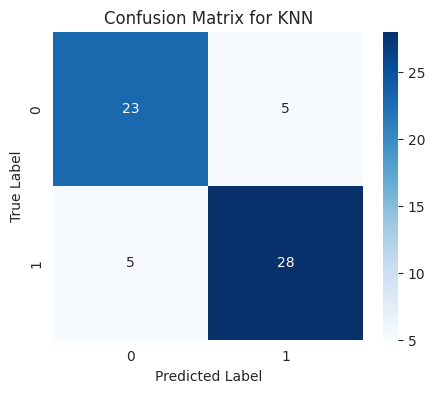

In [61]:
#  calculating confusion matrix and displaying it as a heatmap

knnMatrix = metrics.confusion_matrix(test_y, pred_y_knn)  #  creating a confusion matrix

plt.figure(figsize=(5, 4))  #  deciding plot size
sns.heatmap(knnMatrix, annot=True, fmt='d', cmap='Blues')  #  creating heatmap
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()


# **LOGISTIC REGRESSION**

hyperparameter tuning for logistic regression

In [62]:
#  list of c values to test
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]


#dictionary to hold logistic regression score for different c values
lr_score = {}

#create logistic regression models with different c values. The scores are stored in the dictionary
for c in c_values:
  lr = LogisticRegression(C = c, max_iter=10000)
  score =  cross_validate(estimator = lr,
                           X = train_x,
                           y = train_y,
                           cv = kfold,
                           scoring = ('accuracy', 'precision', 'recall', 'f1'),
                          return_train_score = True)

  lr_score[c] = score

#create dictionary to store accuracy, precision, recall and fscore
acc_lr = {}
recall_lr = {}
precision_lr = {}
fscore_lr = {}

#print accuracy, recall, precision and fscores and store mean values in a dictionary
for i in c_values:
  print('C = {} \tAccuracy:{} \tRecall:{} \tPrecision:{} \tFscore:{}'.format(i,lr_score[i]['test_accuracy'].mean(),
                                                                             lr_score[i]['test_recall'].mean(),
                                                                             lr_score[i]['test_precision'].mean(),
                                                                             lr_score[i]['test_f1'].mean()))

  acc_lr[i] = lr_score[i]['test_accuracy'].mean()
  recall_lr[i] = lr_score[i]['test_recall'].mean()
  precision_lr[i] = lr_score[i]['test_precision'].mean()
  fscore_lr[i] = lr_score[i]['test_f1'].mean()

#print the models with best score in each category
print("\nLR with highest accuracy:{}. \tAccuracy:{}".format(max(acc_lr, key = acc_lr.get), max(acc_lr.values())))
print("LR with highest recall:{}. \tRecall:{}".format(max(recall_lr, key = recall_lr.get), max(recall_lr.values())))
print("LR with highest precision:{}. \tPrecision:{}".format(max(precision_lr, key = precision_lr.get), max(precision_lr.values())))
print("LR with highest fscore:{}. \tFscore:{}".format(max(fscore_lr, key = fscore_lr.get), max(fscore_lr.values())))

C = 0.001 	Accuracy:0.7512755102040816 	Recall:0.9795454545454545 	Precision:0.702137963065151 	Fscore:0.8096311161280433
C = 0.01 	Accuracy:0.8261904761904763 	Recall:0.8677899686520376 	Precision:0.821722027972028 	Fscore:0.8412830275431601
C = 0.1 	Accuracy:0.8343537414965987 	Recall:0.8815047021943574 	Precision:0.8218031430934657 	Fscore:0.8480456741326308
C = 1 	Accuracy:0.8304421768707483 	Recall:0.879075235109718 	Precision:0.8217646290491117 	Fscore:0.845570274691714
C = 10 	Accuracy:0.8262755102040817 	Recall:0.8624085684430511 	Precision:0.8240948275862069 	Fscore:0.8379731108189142
C = 100 	Accuracy:0.8262755102040817 	Recall:0.8624085684430511 	Precision:0.8240948275862069 	Fscore:0.8379731108189142
C = 1000 	Accuracy:0.8262755102040817 	Recall:0.8624085684430511 	Precision:0.8240948275862069 	Fscore:0.8379731108189142

LR with highest accuracy:0.1. 	Accuracy:0.8343537414965987
LR with highest recall:0.001. 	Recall:0.9795454545454545
LR with highest precision:10. 	Precisio

Testing Logistic Regression

In [63]:
#train logistic regression with optimal c value
lr_optimal = LogisticRegression(C = 0.1, max_iter = 10000)

#fit the model with train dataset
lr_optimal.fit(train_x, train_y)

#predict value from test dataset
pred_y_lr = lr_optimal.predict(test_x)

#evaluate scores and print them
report = classification_report(test_y, pred_y_lr, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8333    0.8929    0.8621        28
           1     0.9032    0.8485    0.8750        33

    accuracy                         0.8689        61
   macro avg     0.8683    0.8707    0.8685        61
weighted avg     0.8711    0.8689    0.8691        61



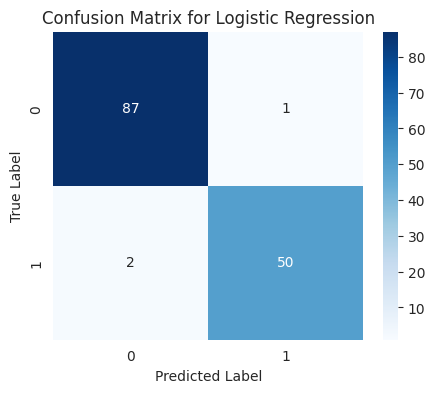

In [ ]:
#  calculating confusion matrix and displaying it as a heatmap

LRMatrix = metrics.confusion_matrix(test_y, pred_y_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(LRMatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()